In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import umap

from scipy import stats
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer


In [2]:
# Fijamos el directorio de trabajo
DIRECTORY =  "/home/spperez/masiv_model/"

In [3]:
# Datos
df = pd.read_csv(DIRECTORY + "data/processed/rfm_standardized.csv", index_col="CustomerID")
df.head()

Recency  Frequency  MonetaryValue  FrequencyStd  RecencyStd  \
CustomerID                                                                
12346.0       325.0          1       77183.60     -0.425097    2.189389   
12347.0         2.0          7        4310.00      0.354417   -0.900588   
12348.0        75.0          4        1797.24     -0.035340   -0.170593   
12349.0        18.0          1        1757.55     -0.425097   -0.740589   
12350.0       310.0          1         334.40     -0.425097    2.179389   

            MonetaryValueStd  
CustomerID                    
12346.0             0.421395  
12347.0             0.250966  
12348.0            -0.028596  
12349.0            -0.033012  
12350.0            -0.191347

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Recency           4338 non-null   float64
 1   Frequency         4338 non-null   int64  
 2   MonetaryValue     4338 non-null   float64
 3   FrequencyStd      4338 non-null   float64
 4   RecencyStd        4338 non-null   float64
 5   MonetaryValueStd  4338 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 237.2 KB


In [5]:
df.describe()

Recency    Frequency  MonetaryValue  FrequencyStd   RecencyStd  \
count  4338.000000  4338.000000    4338.000000   4338.000000  4338.000000   
mean     92.059474     4.272015    2054.266460     -0.086313    -0.017466   
std     100.012264     7.697998    8989.230441      0.436310     0.955076   
min       0.000000     1.000000       3.750000     -0.425097    -0.900588   
25%      17.000000     1.000000     307.415000     -0.425097    -0.750589   
50%      50.000000     2.000000     674.485000     -0.295178    -0.420592   
75%     141.750000     5.000000    1661.740000      0.094579     0.496902   
max     373.000000   209.000000  280206.020000      1.133930     2.189389   

       MonetaryValueStd  
count       4338.000000  
mean          -0.082438  
std            0.169799  
min           -0.216056  
25%           -0.194350  
50%           -0.153510  
75%           -0.043671  
max            0.421395

In [6]:
df_rmf_std = pd.DataFrame(df, columns=["FrequencyStd", "RecencyStd", "MonetaryValueStd"])
df_rmf_std

FrequencyStd  RecencyStd  MonetaryValueStd
CustomerID                                            
12346.0        -0.425097    2.189389          0.421395
12347.0         0.354417   -0.900588          0.250966
12348.0        -0.035340   -0.170593         -0.028596
12349.0        -0.425097   -0.740589         -0.033012
12350.0        -0.425097    2.179389         -0.191347
...                  ...         ...               ...
18280.0        -0.425097    1.849392         -0.208459
18281.0        -0.425097    0.879399         -0.216056
18282.0        -0.295178   -0.850588         -0.208742
18283.0         1.133930   -0.890588          0.004519
18287.0        -0.165259   -0.500591         -0.024141

[4338 rows x 3 columns]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


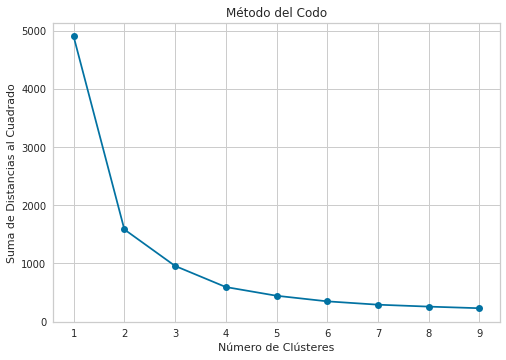

In [7]:
# Número de Grupos
inertias = [] 
K = range(1,10) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k, random_state = 123).fit(df_rmf_std) 
    kmeanModel.fit(df_rmf_std)     
    inertias.append(kmeanModel.inertia_) 

# Grafico
plt.plot(K, inertias, marker = 'o') 
plt.xlabel('Número de Clústeres') 
plt.ylabel('Suma de Distancias al Cuadrado') 
plt.title('Método del Codo') 
plt.show() 

El gráfico de la suma de distancias al cuadrado (Elbow Method) sugiere que el número óptimo de clústeres está entre 4 y 5.

In [8]:
def kmeans(normalised_df_rfm, clusters_number, origin_data):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 123)
    kmeans.fit(normalised_df_rfm)

    # Saca los clústeres
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = origin_data.assign(Cluster = cluster_labels)
    
    # UMAP
    reducer = umap.UMAP(random_state=1234)
    embedding = reducer.fit_transform(normalised_df_rfm)
    
    # Plot
    plt.title("Gráfico de {} Clústeres".format(clusters_number))
    sns.set_theme(style=None)
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

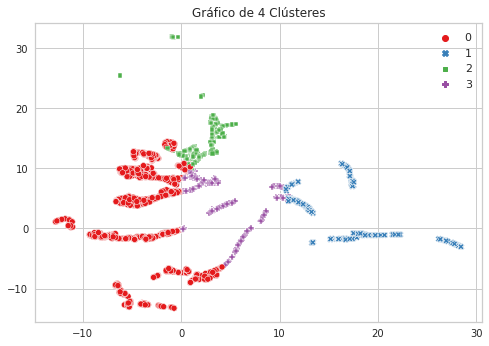

In [9]:
df_rfm_k4 = kmeans(df_rmf_std, 4, df[["Frequency", "Recency", "MonetaryValue"]])

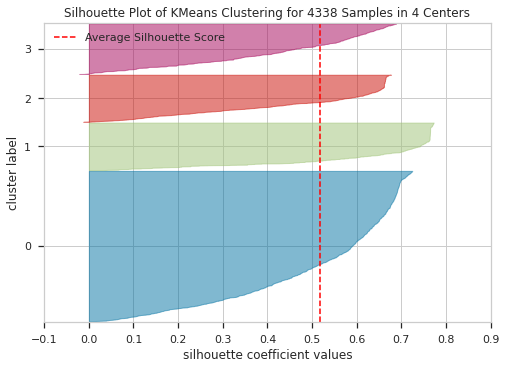

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4338 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
# Índice Silhouette
model = KMeans(4, random_state=123)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick', show=False)
visualizer.fit(df_rmf_std)
visualizer.show()       

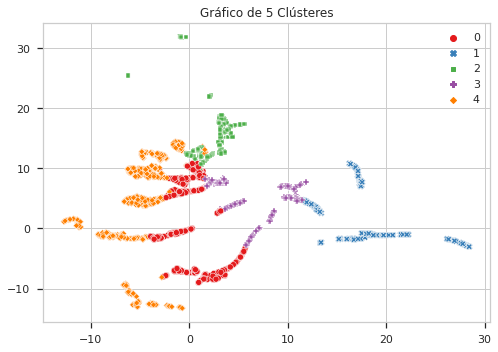

In [11]:
df_rfm_k5 = kmeans(df_rmf_std, 5, df[["Frequency", "Recency", "MonetaryValue"]])

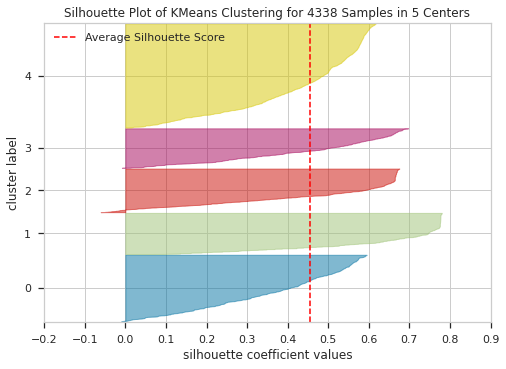

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4338 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
# Índice Silhouette
model = KMeans(5, random_state=123)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_rmf_std)        
visualizer.show() 

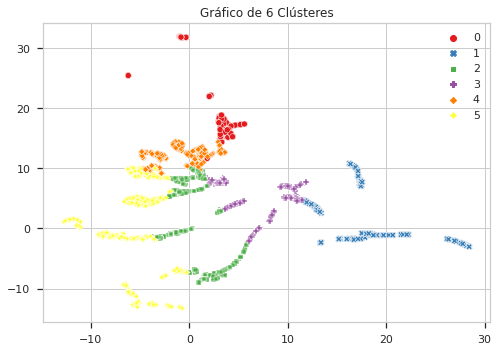

In [13]:
df_rfm_k6 = kmeans(df_rmf_std, 6, df[["Frequency", "Recency", "MonetaryValue"]])

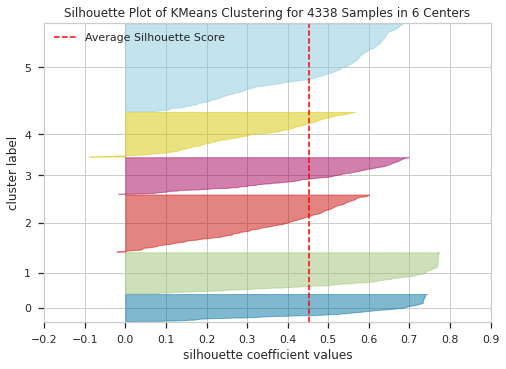

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4338 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
# Índice Silhouette
model = KMeans(6, random_state=123)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_rmf_std)        
visualizer.show() 

Con ayuda del índice silhouette se selecciona k = 4 como el numero óptimo de clústeres.

In [16]:
# Resumen de las varaibles originales por cada cluster
df_rfm_k4.groupby(["Cluster"]).agg({
    "Recency": ["mean", "min", "max"],
    "Frequency": ["mean", "min", "max"],
    "MonetaryValue": ["mean", "min", "max"]
})

Recency                Frequency          MonetaryValue          \
               mean    min    max       mean min  max          mean     min   
Cluster                                                                       
0         36.252947    0.0   92.0   2.719402   1    7   1069.952241    6.20   
1        285.748212  210.0  373.0   1.374821   1   34    597.078871    3.75   
2         16.549133    0.0  120.0  14.335260   6  209   8008.144595  201.12   
3        146.005398   91.0  217.0   2.229420   1   12    799.054076   15.00   

                    
               max  
Cluster             
0        168472.50  
1         77183.60  
2        280206.02  
3         39916.50

In [11]:
# Tamaño de los clústeres
df_rfm_k4.groupby(["Cluster"]).agg({
    "Recency": lambda x:len(x)
})

Recency
Cluster         
0           2206
1            699
2            692
3            741

In [12]:
df_rfm_k4

Frequency  Recency  MonetaryValue  Cluster
CustomerID                                            
12346.0             1    325.0       77183.60        1
12347.0             7      2.0        4310.00        2
12348.0             4     75.0        1797.24        0
12349.0             1     18.0        1757.55        0
12350.0             1    310.0         334.40        1
...               ...      ...            ...      ...
18280.0             1    277.0         180.60        1
18281.0             1    180.0          80.82        3
18282.0             2      7.0         178.05        0
18283.0            16      3.0        2094.88        2
18287.0             3     42.0        1837.28        0

[4338 rows x 4 columns]

In [16]:
(df_rfm_k4.groupby(["Cluster"]).agg({
    "MonetaryValue": ["sum"]
})/8911407.904)*100

MonetaryValue
                  sum
Cluster              
0           26.486439
1            4.683414
2           62.185865
3            6.644282

In [17]:
(df_rfm_k4.groupby(["Cluster"]).agg({
    "Recency": lambda x:len(x)
})/4338)*100

Recency
Cluster           
0        50.852928
1        16.113416
2        15.952052
3        17.081604